In [342]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from sklearn.metrics import r2_score


In [343]:
#reading the dataset

df = pd.read_csv(r'day.csv')

In [344]:
#checking the head records

df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [270]:
# checking the shape of dataset 

df.shape

(730, 16)

In [271]:
#checking the info of dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [272]:
# describing the columns of dataframe

df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [273]:
# checking the null values

df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [ ]:
# As we can not see any of the null values present in the dataset.

In [274]:
# Checking for duplicate rows

df_copy = df.copy()
df_copy.shape

(730, 16)

In [278]:
df_copy.drop_duplicates(inplace=True)
df_copy.shape

(730, 16)

In [ ]:
# We can not see any duplicate rows since shape before and after removing the duplicate rows is same

## Removing Unwanted Columns

In [ ]:
# Column instant is the index for the row so it can be removed
# Column dteday is the date column but year and month columns are already provided so it can be removed
# Columns casual and registered can also be removed because we already have column cnt which is the combination of these to columns

In [284]:
drop_unwanted = ['instant','dteday','casual','registered']

df.drop(drop_unwanted,axis=1,inplace=True)

In [285]:
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [345]:

# Mapping data for Columns season, month, weekday, weathersit

df['season'] = df['season'].map({1:'spring', 2:'summer', 3:'fall', 4:'winter'})

In [346]:
df['mnth'] = df['mnth'].map({1:'jan',2:'feb',3:'mar',4:'apr',5:'may',6:'june',7:'july',8:'aug',9:'sep',10:'oct',11:'nov',12:'dec'})

In [347]:
df['weekday'] = df['weekday'].map({0:'sun',1:'mon',2:'tue',3:'wed',4:'thu',5:'fri',6:'sat'})

In [348]:
df['weathersit'] = df['weathersit'].map({1:'Clear',2:'Misty',3:'Light_snowrain',4:'Heavy_snowrain'})

In [349]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,spring,0,jan,0,sat,0,Misty,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,spring,0,jan,0,sun,0,Misty,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,spring,0,jan,0,mon,1,Clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,spring,0,jan,0,tue,1,Clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,spring,0,jan,0,wed,1,Clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600


# Data Visualisation

<Figure size 1440x1440 with 0 Axes>

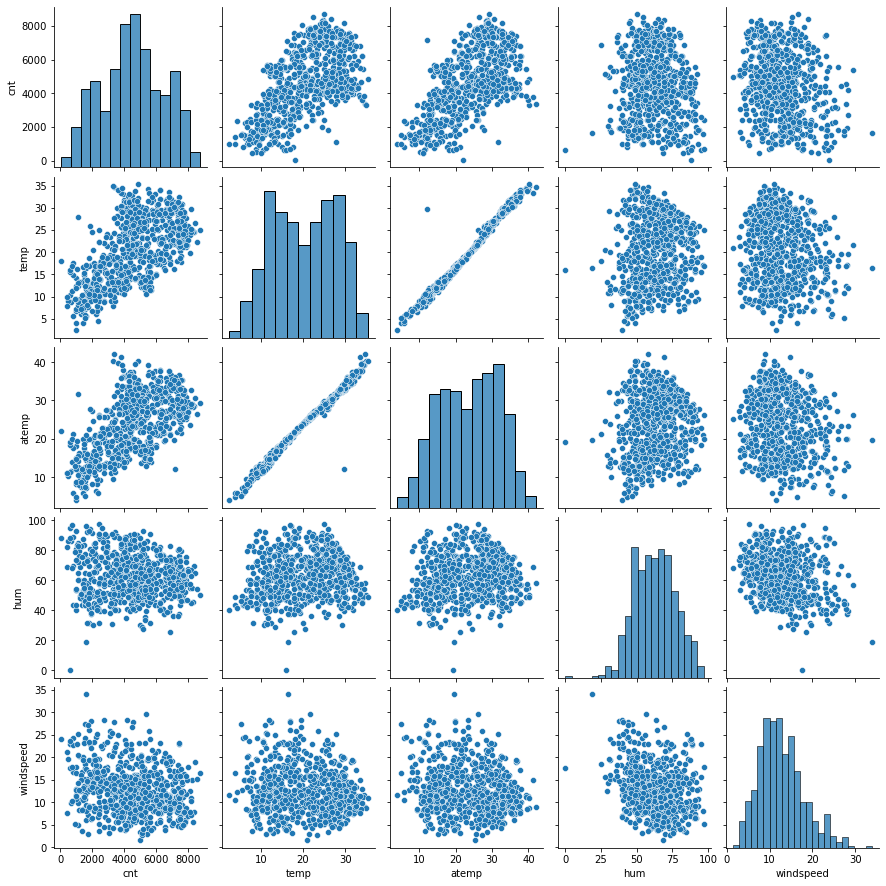

In [291]:
# Draw pair Plots to check the linear relationship

plt.figure(figsize = (20,20))
sns.pairplot(data=df,vars=['cnt', 'temp', 'atemp', 'hum','windspeed'])
plt.show()

In [ ]:
#We can observe a LINEAR RELATION between 'temp','atemp' and 'cnt'

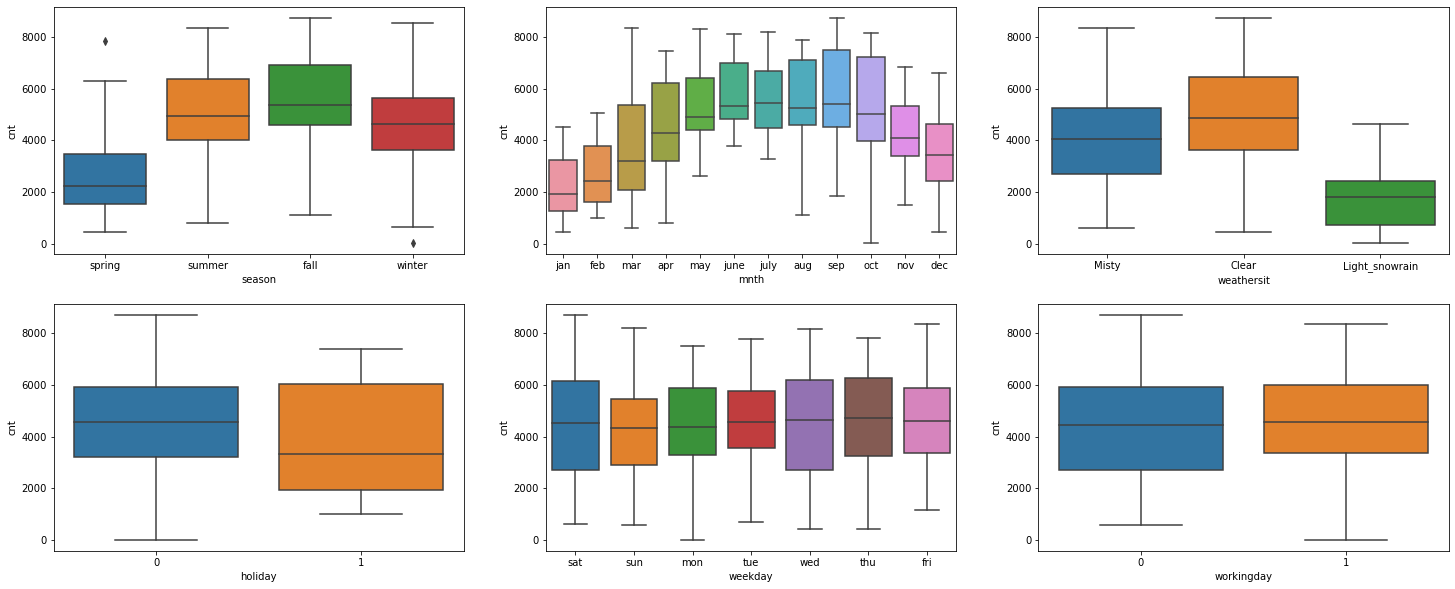

In [292]:
# Build boxplot of all categorical variables (before creating dummies) againt the target variable 'cnt' 
# to see how each of the predictor variable stackup against the target variable.

plt.figure(figsize=(25, 10))
plt.subplot(2,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = df)
plt.subplot(2,3,2)
sns.boxplot(x = 'mnth', y = 'cnt', data = df)
plt.subplot(2,3,3)
sns.boxplot(x = 'weathersit', y = 'cnt', data = df)
plt.subplot(2,3,4)
sns.boxplot(x = 'holiday', y = 'cnt', data = df)
plt.subplot(2,3,5)
sns.boxplot(x = 'weekday', y = 'cnt', data = df)
plt.subplot(2,3,6)
sns.boxplot(x = 'workingday', y = 'cnt', data = df)
plt.show()

<AxesSubplot:xlabel='workingday', ylabel='cnt'>

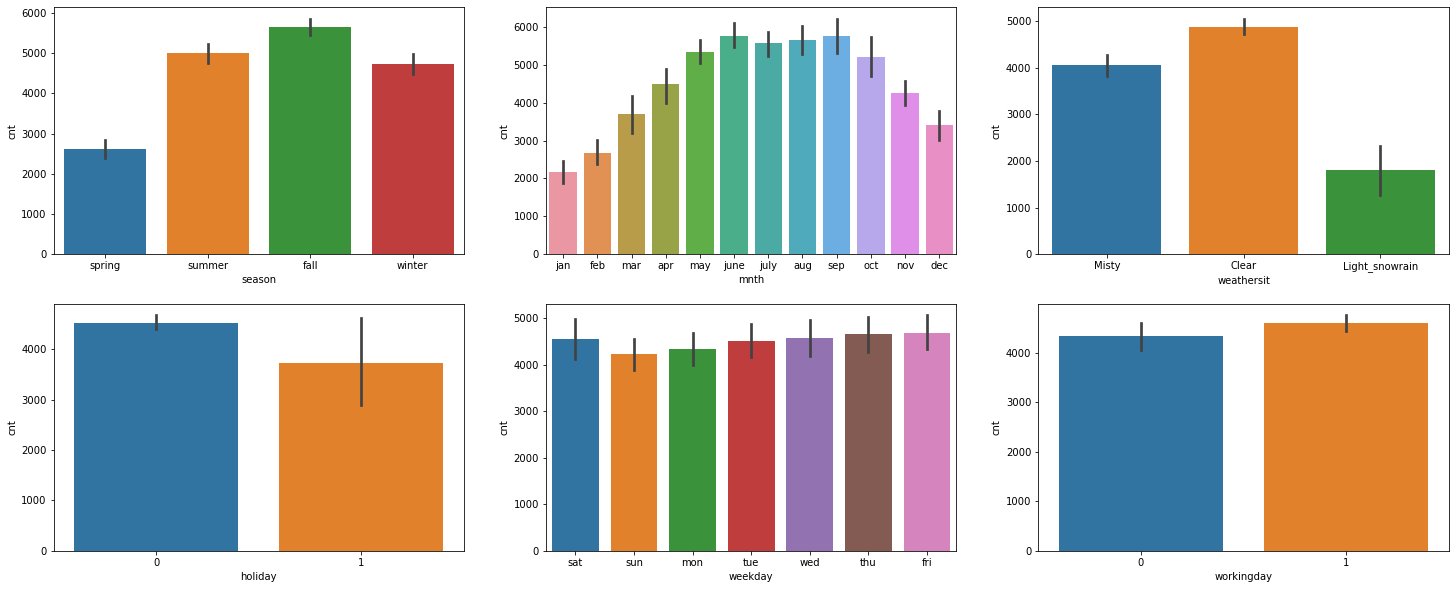

In [293]:
plt.figure(figsize = (25,10))
plt.subplot(2,3,1)
sns.barplot('season','cnt',data=df)
plt.subplot(2,3,2)
sns.barplot('mnth','cnt',data=df)
plt.subplot(2,3,3)
sns.barplot('weathersit','cnt',data=df)
plt.subplot(2,3,4)
sns.barplot('holiday','cnt',data=df)
plt.subplot(2,3,5)
sns.barplot('weekday','cnt',data=df)
plt.subplot(2,3,6)
sns.barplot('workingday','cnt',data=df)

season: Most of the bookings were done in Fall season.
mnth : Most of the bookings were done during the month of may, june, july, aug, sep and oct.
weathersit : Most of the bookings were done in clear wethersit.
Holiday : most of the bookings were done on weekdays
weekday : most of the bookings were done on Thu, Fir, Sat and Sun
workingday : count seems almost equal for working and non working day.

In [ ]:
#Correlation Matrix

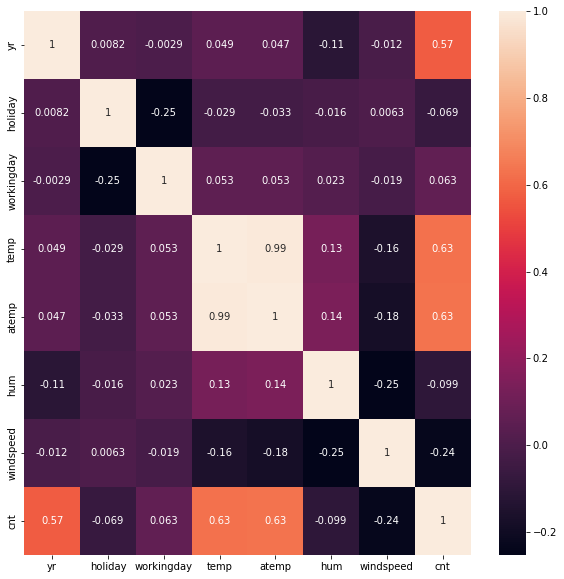

In [73]:
plt.figure(figsize = (10,10))
sns.heatmap(df.corr(), annot = True)
plt.show()

As we can see there is linear relationship between temp and atemp. Both of the parameters cannot be used in the model due to multicolinearity. based on VIF and p-value we will decide which parameters to keep

## Data Preparation

#Creating Dummy Variables

In [350]:
df = pd.get_dummies(df, drop_first=True)
df.head()

,instant,yr,holiday,workingday,temp,atemp,hum,windspeed,casual,registered,...,mnth_oct,mnth_sep,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_Light_snowrain,weathersit_Misty
0,1,0,0,0,14.110847,18.18125,80.5833,10.749882,331,654,...,0,0,0,1,0,0,0,0,0,1
1,2,0,0,0,14.902598,17.68695,69.6087,16.652113,131,670,...,0,0,0,0,1,0,0,0,0,1
2,3,0,0,1,8.050924,9.47025,43.7273,16.636703,120,1229,...,0,0,1,0,0,0,0,0,0,0
3,4,0,0,1,8.200000,10.60610,59.0435,10.739832,108,1454,...,0,0,0,0,0,0,1,0,0,0
4,5,0,0,1,9.305237,11.46350,43.6957,12.522300,82,1518,...,0,0,0,0,0,0,0,1,0,0


In [295]:
df.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt', 'season_spring', 'season_summer', 'season_winter', 'mnth_aug',
       'mnth_dec', 'mnth_feb', 'mnth_jan', 'mnth_july', 'mnth_june',
       'mnth_mar', 'mnth_may', 'mnth_nov', 'mnth_oct', 'mnth_sep',
       'weekday_mon', 'weekday_sat', 'weekday_sun', 'weekday_thu',
       'weekday_tue', 'weekday_wed', 'weathersit_Light_snowrain',
       'weathersit_Misty'],
      dtype='object')

In [351]:
#Splitting the Data into train and test sets
np.random.seed(0)
df_train, df_test = train_test_split(df, train_size = 0.70,test_size=0.30, random_state = 100)

In [352]:
df_train.head()
df_train.shape

(510, 762)

In [353]:
df_test.shape

(219, 762)

In [354]:
#Scalling the Numerical columns
scaler = MinMaxScaler()
num_vars = ['temp','atemp','hum','windspeed','cnt']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [355]:
df_train.head()
df_train.describe()

,instant,yr,holiday,workingday,temp,atemp,hum,windspeed,casual,registered,...,mnth_oct,mnth_sep,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_Light_snowrain,weathersit_Misty
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,368.941176,0.507843,0.025490,0.676471,0.537262,0.512989,0.650369,0.320768,837.543137,3648.839216,...,0.086275,0.080392,0.150980,0.154902,0.143137,0.133333,0.131373,0.158824,0.029412,0.343137
std,209.868619,0.500429,0.157763,0.468282,0.225844,0.212385,0.145882,0.169797,675.921998,1580.336986,...,0.281045,0.272166,0.358381,0.362166,0.350557,0.340268,0.338139,0.365870,0.169124,0.475223
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,20.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,187.250000,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,311.000000,2468.250000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,373.000000,1.000000,0.000000,1.000000,0.540519,0.526811,0.653714,0.296763,700.000000,3657.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,553.750000,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,1076.250000,4841.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,729.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3283.000000,6946.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [301]:
# Deviding X and Y
y_train = df_train.pop('cnt')
X_train = df_train

In [302]:
y_train.head()

311    0.481247
523    0.887483
381    0.335136
413    0.494248
253    0.578003
Name: cnt, dtype: float64

In [303]:
X_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,season_spring,season_summer,season_winter,...,mnth_oct,mnth_sep,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_Light_snowrain,weathersit_Misty
311,0,0,1,0.435124,0.437339,0.743667,0.057471,0,0,1,...,0,0,0,0,0,0,1,0,0,0
523,1,0,1,0.735215,0.680985,0.482181,0.286093,0,1,0,...,0,0,0,0,0,0,0,0,0,0
381,1,0,1,0.391151,0.374375,0.737917,0.659615,1,0,0,...,0,0,0,0,0,0,1,0,0,1
413,1,0,0,0.358285,0.362754,0.550880,0.319514,1,0,0,...,0,0,0,1,0,0,0,0,0,0
253,0,0,0,0.740406,0.695906,0.735509,0.156398,0,0,0,...,0,1,0,0,1,0,0,0,0,0


In [356]:
# Recursive feature elimination 
lm = LinearRegression()
lm.fit(X_train, y_train)
rfe = RFE(lm, n_features_to_select=15)
rfe = rfe.fit(X_train, y_train)

In [305]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', False, 6),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_spring', True, 1),
 ('season_summer', True, 1),
 ('season_winter', True, 1),
 ('mnth_aug', False, 10),
 ('mnth_dec', False, 2),
 ('mnth_feb', False, 4),
 ('mnth_jan', False, 3),
 ('mnth_july', True, 1),
 ('mnth_june', False, 11),
 ('mnth_mar', False, 15),
 ('mnth_may', False, 9),
 ('mnth_nov', True, 1),
 ('mnth_oct', False, 14),
 ('mnth_sep', True, 1),
 ('weekday_mon', False, 7),
 ('weekday_sat', True, 1),
 ('weekday_sun', False, 5),
 ('weekday_thu', False, 12),
 ('weekday_tue', False, 8),
 ('weekday_wed', False, 13),
 ('weathersit_Light_snowrain', True, 1),
 ('weathersit_Misty', True, 1)]

In [357]:
col = X_train.columns[rfe.support_]
print(col)

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed',
       'season_spring', 'season_summer', 'season_winter', 'mnth_july',
       'mnth_nov', 'mnth_sep', 'weekday_sat', 'weathersit_Light_snowrain',
       'weathersit_Misty'],
      dtype='object')


In [358]:
X_train.columns[~rfe.support_]

Index(['atemp', 'mnth_aug', 'mnth_dec', 'mnth_feb', 'mnth_jan', 'mnth_june',
       'mnth_mar', 'mnth_may', 'mnth_oct', 'weekday_mon', 'weekday_sun',
       'weekday_thu', 'weekday_tue', 'weekday_wed'],
      dtype='object')

In [308]:
X_train_rfe = X_train[col]

In [359]:
#VIF CHECK Model 1

vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,hum,28.35
3,temp,16.66
2,workingday,5.08
5,windspeed,4.69
6,season_spring,4.37
8,season_winter,3.70
7,season_summer,2.80
14,weathersit_Misty,2.29
0,yr,2.08
12,weekday_sat,1.91


In [360]:
# Check stats Using Stats model
# Add a constant
X_train_lm1 = sm.add_constant(X_train_rfe)

# Create a first fitted model
lr1 = sm.OLS(y_train, X_train_lm1).fit()
print(lr1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.847
Method:                 Least Squares   F-statistic:                     202.2
Date:                Wed, 11 Jan 2023   Prob (F-statistic):          3.32e-208
Time:                        07:59:26   Log-Likelihood:                 561.02
No. Observations:                 547   AIC:                            -1090.
Df Residuals:                     531   BIC:                            -1021.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

In [364]:
# As hum shows high VIF hence we can drop it
X_train_new = X_train_rfe.drop(['hum'], axis = 1)

In [365]:
# MOdel 2
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,temp,6.80
2,workingday,5.01
4,windspeed,4.64
5,season_spring,2.50
7,season_winter,2.44
6,season_summer,2.33
0,yr,2.07
11,weekday_sat,1.90
13,weathersit_Misty,1.59
8,mnth_july,1.56


In [366]:
# Check stats Using Stats model
# Add a constant
X_train_lm2 = sm.add_constant(X_train_new)

# Create a first fitted model
lr2 = sm.OLS(y_train, X_train_lm2).fit()
print(lr2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     207.4
Date:                Wed, 11 Jan 2023   Prob (F-statistic):          6.15e-205
Time:                        08:02:08   Log-Likelihood:                 550.46
No. Observations:                 547   AIC:                            -1071.
Df Residuals:                     532   BIC:                            -1006.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

In [367]:
# We can drop mnth_nov variable as it has high P Value
X_train_new = X_train_new.drop(['mnth_nov'], axis = 1)

In [315]:
# MOdel 3
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,temp,6.77
2,workingday,4.99
4,windspeed,4.60
5,season_spring,2.49
6,season_summer,2.32
0,yr,2.07
7,season_winter,1.97
10,weekday_sat,1.90
12,weathersit_Misty,1.58
8,mnth_july,1.56


In [368]:
# Check stats Using Stats model
# Add a constant
X_train_lm3 = sm.add_constant(X_train_new)

# Create a first fitted model
lr3 = sm.OLS(y_train, X_train_lm3).fit()
print(lr3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     222.9
Date:                Wed, 11 Jan 2023   Prob (F-statistic):          1.05e-205
Time:                        08:02:31   Log-Likelihood:                 549.46
No. Observations:                 547   AIC:                            -1071.
Df Residuals:                     533   BIC:                            -1011.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

In [369]:
# We can drop mnth_july variable as it has high P Value
X_train_new = X_train_new.drop(['mnth_july'], axis = 1)

In [370]:
# MOdel 43
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,temp,5.54
2,workingday,4.99
4,windspeed,4.60
5,season_spring,2.39
0,yr,2.07
6,season_summer,1.99
9,weekday_sat,1.90
7,season_winter,1.81
11,weathersit_Misty,1.58
8,mnth_sep,1.25


In [371]:
# Check stats Using Stats model
# Add a constant
X_train_lm4 = sm.add_constant(X_train_new)

# Create a first fitted model
lr4 = sm.OLS(y_train, X_train_lm4).fit()
print(lr4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     237.7
Date:                Wed, 11 Jan 2023   Prob (F-statistic):          3.38e-205
Time:                        08:02:50   Log-Likelihood:                 545.42
No. Observations:                 547   AIC:                            -1065.
Df Residuals:                     534   BIC:                            -1009.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

In [372]:
# We can drop workingday variable as it has high P Value
X_train_new = X_train_new.drop(['workingday'], axis = 1)

In [321]:
# MOdel 4
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,windspeed,4.55
2,temp,3.89
0,yr,2.06
4,season_spring,2.04
5,season_summer,1.91
6,season_winter,1.64
10,weathersit_Misty,1.57
7,mnth_sep,1.24
8,weekday_sat,1.19
9,weathersit_Light_snowrain,1.08


In [373]:
# Check stats Using Stats model
# Add a constant
X_train_lm5 = sm.add_constant(X_train_new)

# Create a first fitted model
lr5 = sm.OLS(y_train, X_train_lm5).fit()
print(lr5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     249.3
Date:                Wed, 11 Jan 2023   Prob (F-statistic):          1.97e-202
Time:                        08:03:14   Log-Likelihood:                 536.02
No. Observations:                 547   AIC:                            -1048.
Df Residuals:                     535   BIC:                            -996.4
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

In [374]:
# We can drop workingday variable as it has high P Value
X_train_new = X_train_new.drop(['weekday_sat'], axis = 1)

In [324]:
# MOdel 4
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,windspeed,4.52
2,temp,3.87
0,yr,2.06
4,season_spring,2.03
5,season_summer,1.91
6,season_winter,1.63
9,weathersit_Misty,1.57
7,mnth_sep,1.24
8,weathersit_Light_snowrain,1.08
1,holiday,1.05


In [375]:
# Check stats Using Stats model
# Add a constant
X_train_lm6 = sm.add_constant(X_train_new)

# Create a first fitted model
lr6 = sm.OLS(y_train, X_train_lm6).fit()
print(lr6.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     273.0
Date:                Wed, 11 Jan 2023   Prob (F-statistic):          4.87e-203
Time:                        08:03:39   Log-Likelihood:                 534.55
No. Observations:                 547   AIC:                            -1047.
Df Residuals:                     536   BIC:                            -999.7
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

We can cosider the above model i.e lr_6, as it seems to have very low multicolinearity between the predictors and the p-values for all the predictors seems to be significant.

F-Statistics value of 273.0 (which is greater than 1) and the p-value of 4.87e-203 i.e almost equals to zero, states that the overall model is significant

## Residual Analysis

In [376]:
lr6.params

const                        0.183660
yr                           0.233105
holiday                     -0.113324
temp                         0.485878
windspeed                   -0.141695
season_spring               -0.057203
season_summer                0.063163
season_winter                0.101575
mnth_sep                     0.089004
weathersit_Light_snowrain   -0.287510
weathersit_Misty            -0.078730
dtype: float64

In [377]:
X_train_lm6

,const,yr,holiday,temp,windspeed,season_spring,season_summer,season_winter,mnth_sep,weathersit_Light_snowrain,weathersit_Misty
311,1.0,0,0,0.435124,0.057471,0,0,1,0,0,0
523,1.0,1,0,0.735215,0.286093,0,1,0,0,0,0
381,1.0,1,0,0.391151,0.659615,1,0,0,0,0,1
413,1.0,1,0,0.358285,0.319514,1,0,0,0,0,0
253,1.0,0,0,0.740406,0.156398,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
578,1.0,1,0,0.863973,0.187140,0,0,0,0,0,0
53,1.0,0,0,0.202618,0.111379,1,0,0,0,0,0
350,1.0,0,0,0.248216,0.431816,0,0,1,0,0,1
79,1.0,0,0,0.462664,0.529881,0,1,0,0,0,1


In [378]:
y_train_pred = lr6.predict(X_train_lm6)

Text(0.5, 0, 'Errors')

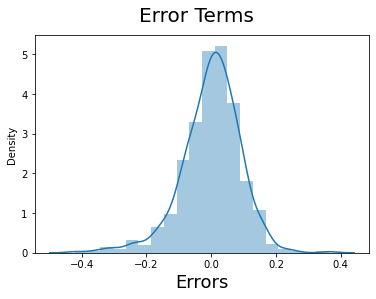

In [329]:
# Ploting error term graph

fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20) 
plt.xlabel('Errors', fontsize = 18)

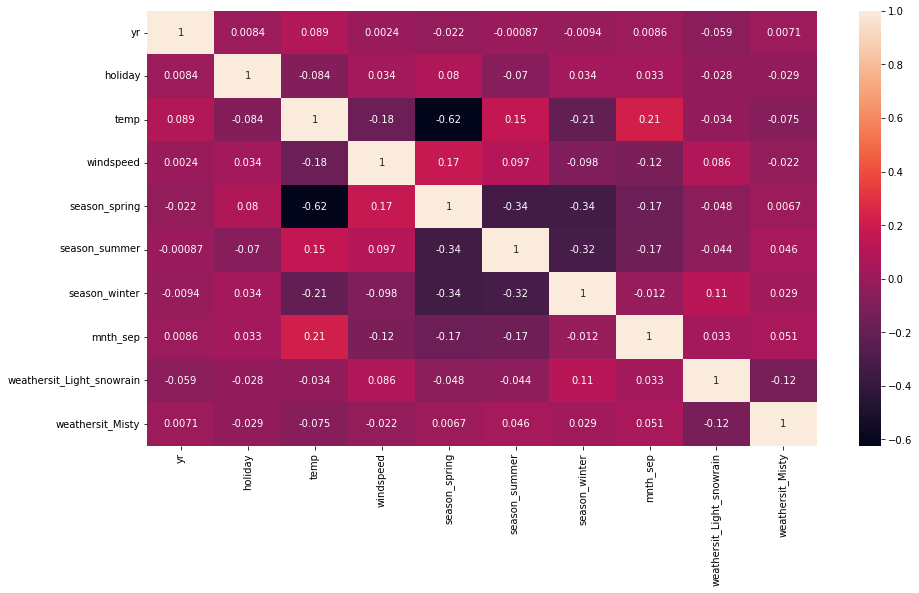

In [330]:
# Correleaniarity

plt.figure(figsize=(15,8))
sns.heatmap(X_train_new.corr(),annot = True)
plt.show()

## Making Predictions Using the Final Model


In [379]:
num_vars = ['temp','atemp','hum','windspeed','cnt']
df_test[num_vars] = scaler.transform(df_test[num_vars])
df_test.head()

,instant,yr,holiday,workingday,temp,atemp,hum,windspeed,casual,registered,...,mnth_oct,mnth_sep,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_Light_snowrain,weathersit_Misty
184,185,0,1,0,0.831783,0.769660,0.657364,0.084219,3065,2978,...,0,0,1,0,0,0,0,0,0,1
535,536,1,0,1,0.901354,0.842587,0.610133,0.153728,872,5339,...,0,0,0,0,0,0,0,1,0,0
299,300,0,0,1,0.511964,0.496145,0.837699,0.334206,240,2419,...,1,0,0,0,0,1,0,0,0,1
221,222,0,0,1,0.881625,0.795343,0.437098,0.339570,884,3896,...,0,0,0,0,0,0,0,1,0,0
152,153,0,0,1,0.817246,0.741471,0.314298,0.537414,736,4232,...,0,0,0,0,0,1,0,0,0,0


In [332]:
df_test.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_oct,mnth_sep,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_Light_snowrain,weathersit_Misty
count,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,...,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000
mean,0.475410,0.032787,0.726776,0.568688,0.542076,0.635166,0.316439,0.530233,0.213115,0.273224,...,0.076503,0.087432,0.114754,0.120219,0.120219,0.174863,0.163934,0.109290,0.032787,0.300546
std,0.500765,0.178567,0.446837,0.234887,0.219336,0.152926,0.159371,0.215783,0.410632,0.446837,...,0.266530,0.283242,0.319599,0.326109,0.326109,0.380892,0.371232,0.312858,0.178567,0.459754
min,0.000000,0.000000,0.000000,0.046591,0.025950,0.261915,-0.042808,0.048205,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.362754,0.354867,0.522601,0.199183,0.393293,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.575304,0.558309,0.618721,0.303464,0.533134,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.774153,0.729061,0.735079,0.404383,0.681086,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,0.984424,0.980934,1.002146,0.807474,0.963300,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [380]:
y_test = df_test.pop('cnt')
X_test = df_test

In [381]:
col1 = X_train_new.columns

X_test = X_test[col1]

# Adding constant variable to test dataframe
X_test_lm6 = sm.add_constant(X_test)
y_pred = lr6.predict(X_test_lm6)


In [382]:
y_pred = lr6.predict(X_test_lm6)

In [383]:
r2 = r2_score(y_test, y_pred)
round(r2,4)

0.8038

In [ ]:
#R-squared value for test set is 0.8038

In [ ]:
# Now Calculate Adjusted R-squared

In [384]:
# n is number of rows in X
n = X_test.shape[0]

# Number of features (predictors, p) is the shape along axis 1
p = X_test.shape[1]

print(n)
print(p)

219
10


In [385]:
adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
adjusted_r2

0.7943960093662201

Text(0, 0.5, 'y_pred')

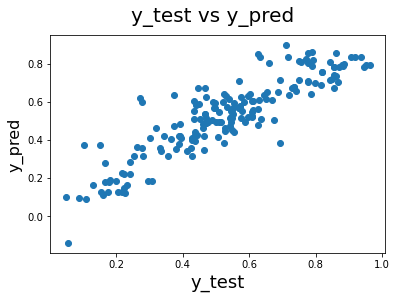

In [337]:
fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20) 
plt.xlabel('y_test', fontsize = 18)
plt.ylabel('y_pred', fontsize = 16) 

In [386]:
round(lr6.params,4)

const                        0.1837
yr                           0.2331
holiday                     -0.1133
temp                         0.4859
windspeed                   -0.1417
season_spring               -0.0572
season_summer                0.0632
season_winter                0.1016
mnth_sep                     0.0890
weathersit_Light_snowrain   -0.2875
weathersit_Misty            -0.0787
dtype: float64

#### cnt = 0.1837 + yr*0.2331 - holiday*0.1133 + temp*0.4859 - windspeed*0.14117 - season_spring*0.0572 + season_summer*0.0632 + season_winter*0.1016 + mnth_sep * 0.0890 - weathersit_Light_snowrain* 0.2875 - weathersit_Misty*0.0787

## Demand of bikes depend on year, holiday, temp, season_spring, season_summer, season_winter, mnth_sep, weathersit_Light_snowrain,weathersit_Misty .